# Model Evaluation and Refinement

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Import clean data

path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv'
df = pd.read_csv(path)

In [3]:
df.to_csv('module_5_auto.csv')

In [4]:
#  First lets only use numeric data

df = df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [5]:
%%capture
! pip install ipywidgets

In [6]:
from IPython.display import display
from IPython.html import widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# Functions for Plotting 

In [7]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize = (width, height))
    
    ax1 = sns.distplot(RedFunction, hist = False, color = "r", label = RedName)
    ax2 = sns.distplot(BlueFunction, hist = False, color = "b", label = BlueName, ax = ax1)
    
    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    
    plt.show()
    plt.close()

In [8]:
def PollyPlot (xtrain, xtest, y_train, y_test, lr, poly_transform):
    width = 12
    height = 10
    plt.figure(figsize = (width, height))
    
    #Training data
    #Testing data
    # lr: linear regression object
    #Poly_transform: polynomial transformation object
    
    xmax = max([xtrain.values.max(), xtest.values.max()])
    
    xmin = min([xtrain.values.min(), xtest.values.min()])
    
    x = np.arange(xmin, xmax, 0.1)
    
    plt.plot(xtrain, y_train, 'ro', label = 'Training Data')
    plt.plot(xtest, y_test, 'go', label = 'Test data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1,1))), label = 'Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

# Training and Testing

In [9]:
# Targt data
y_data = df['price']

In [10]:
# Drop price data in x data
x_data = df.drop('price', axis = 1)

In [11]:
# Randomly split our data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.15, random_state = 1)

print("number of test samples: ", x_test.shape[0])
print("number of training samples: ", x_train.shape[0])

number of test samples:  31
number of training samples:  170


In [12]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 81
number of training samples: 120


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
# Create a Linear Regression object

lre = LinearRegression()

In [15]:
# Fit model using the feature horsepower

lre.fit(x_train[['horsepower']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
# Calculate R^2 on the test data

lre.score(x_test[['horsepower']], y_test)

0.707688374146705

In [17]:
# R^2 of training data

lre.score(x_train[['horsepower']], y_train)

0.6449517437659684

In [18]:
# R^2 on the test data using 90% for training

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.1, random_state=0)

lre.fit(x_train1[['horsepower']], y_train1)

lre.score(x_test1[['horsepower']], y_test1)

0.7340722810055448

# Cross-Validation score 

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv = 4)

In [21]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [22]:
# Average and Standard deviation of our estimate

print("The mean of the folds are", Rcross.mean(), "and the standard deviation is", Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.291183944475603


In [23]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

In [24]:
# Calculate the average R^2 using two folds
# find the average R^2 for the second fold utilizing the horsepower as a feature:

Rcross1 = cross_val_score(lre, x_data[['horsepower']], y_data, cv = 2)
Rcross1

array([0.59015621, 0.44319613])

In [25]:
# Average and Standard deviation of our estimate

print("The mean of the folds are", Rcross1.mean())

The mean of the folds are 0.5166761697127429


In [26]:
# Using cross_val_predict output

from sklearn.model_selection import cross_val_predict

In [27]:
yhat = cross_val_predict(lre, x_data[['horsepower']], y_data, cv = 4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

# Overfitting, Underfitting, and Model Selection

In [28]:
# Create Multiple linear regression objects and train the model 

lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
# Prediction using training data

yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([11927.70699817, 11236.71672034,  6436.91775515, 21890.22064982,
       16667.18254832])

In [30]:
# Prediction using test data

yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.16502418,  5914.48335385, 11243.76325987,  6662.03197043,
       15555.76936275])

In [31]:
# Perform some model evaluation 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

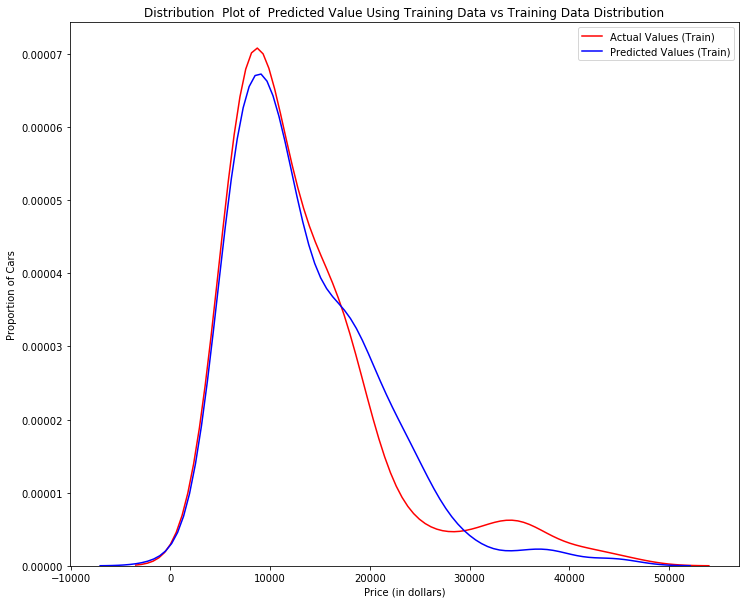

In [32]:
# Lets examine the distribution of the predicted values of the training data

Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

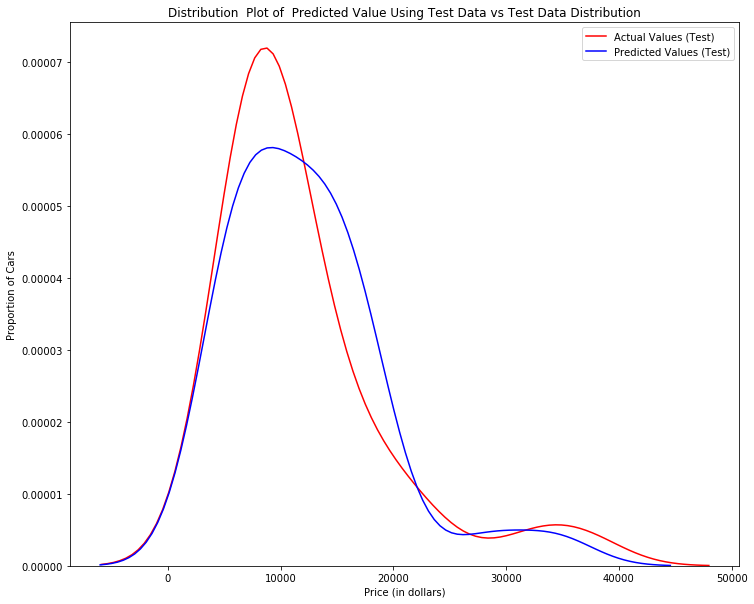

In [33]:
# Lets examine the distribution of the predicted values of the test data

Title = 'Distribution  Plot of  Predicted Value Using Test Data vs Test Data Distribution'
DistributionPlot(y_test, yhat_test, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [34]:
from sklearn.preprocessing import PolynomialFeatures

## Overfitting 

In [35]:
# Lets create a degree 5 polynomial model

# Lets use 55 percent of the data for testing and the rest for training

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.45, random_state = 0)

In [36]:
# Perform a degree 5 polynomial transformation on the feature 'horsepower'

pr = PolynomialFeatures(degree = 5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)

In [37]:
# Create a linear regression model "poly" and train it

poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.65561887  7307.98782321 12213.78770965 18893.24804015]
True values: [ 6295. 10698. 13860. 13499.]


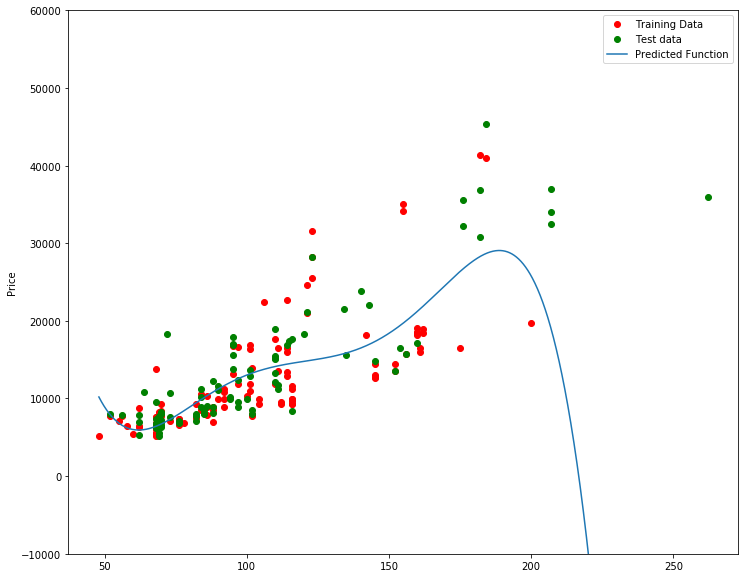

In [39]:
# Display training data, testing data, and predicted function
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

In [40]:
# R^2 of the training data

poly.score(x_train_pr, y_train)

0.556771690212023

In [41]:
# R^2 of the test data

poly.score(x_test_pr, y_test)

-29.871340302044153

Text(3.1, 0.73, 'Maximum R^2')

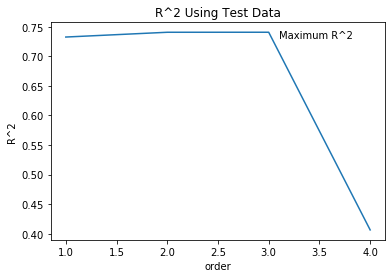

In [42]:
# Let's see how the R^2 changes on the test data for different order polynomials and plot the results

Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree = n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))
    
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3.1, 0.73, 'Maximum R^2')

In [43]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = test_data, random_state = 0)
    pr = PolynomialFeatures(degree = order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr, y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly, pr)

In [44]:
interact(f, order = (0, 6, 1), test_data = (0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [45]:
# Perform polynomial transformation with more than one feature

pr1 = PolynomialFeatures( degree = 2)

In [46]:
#Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size', 'highway-mpg'

x_train_pr1 = pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1 = pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [47]:
# Dimensions?

x_train_pr1.shape 

(110, 15)

In [48]:
# Create linear regression model and train the object

poly1 = LinearRegression()
poly1.fit(x_train_pr1, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

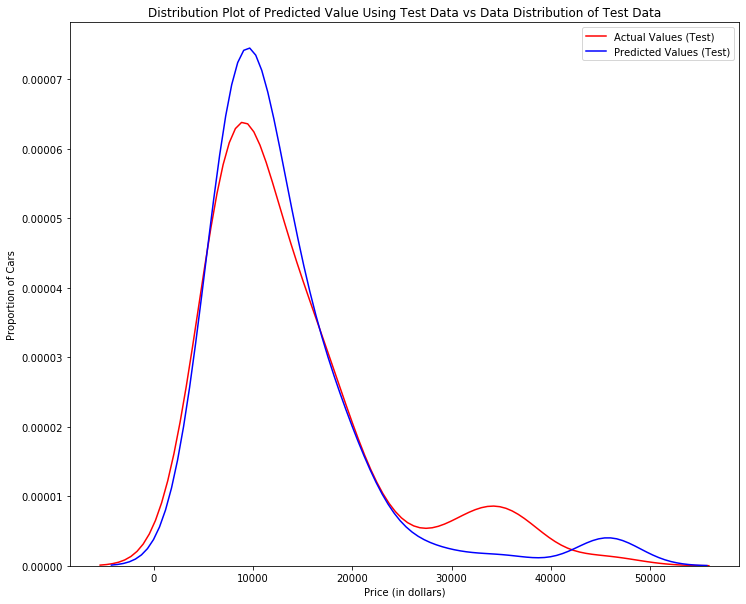

In [49]:
# Predict an output and then dispay

yhat1 = poly1.predict(x_test_pr1)

Title = 'Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat1, "Actual Values (Test)", "Predicted Values (Test)", Title)

# Ridge Regression

In [50]:
# We will analyze how Alpha changes the model

# Test data will be used as validation data

# Lets perform a degree 2 polynomial transformation on our data

In [51]:
pr = PolynomialFeatures(degree = 2)
x_train_pr = pr.fit_transform (x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'normalized-losses', 'symboling']])
x_test_pr = pr.fit_transform (x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'normalized-losses', 'symboling']])

In [52]:
# import Ridge
from sklearn.linear_model import Ridge

In [53]:
# Create Ridge Regression object, set regularization parameter to 0.1

RidgeModel = Ridge(alpha = 0.1)

In [54]:
# Fit
RidgeModel.fit(x_train_pr, y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.02972e-16): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [55]:
# Obtain prediction
yhat = RidgeModel.predict(x_test_pr)

In [56]:
# Lets compare first five predicted samples
print('predicted:', yhat[0:4])
print('test set:', y_test[0:4].values)

predicted: [ 6567.83081933  9597.97151399 20836.22326843 19347.69543463]
test set: [ 6295. 10698. 13860. 13499.]


In [57]:
# Selecting the value of Alfa that minimizes test error
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RidgeModel = Ridge(alpha = alfa)
    RidgeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RidgeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RidgeModel.score(x_train_pr, y_train))

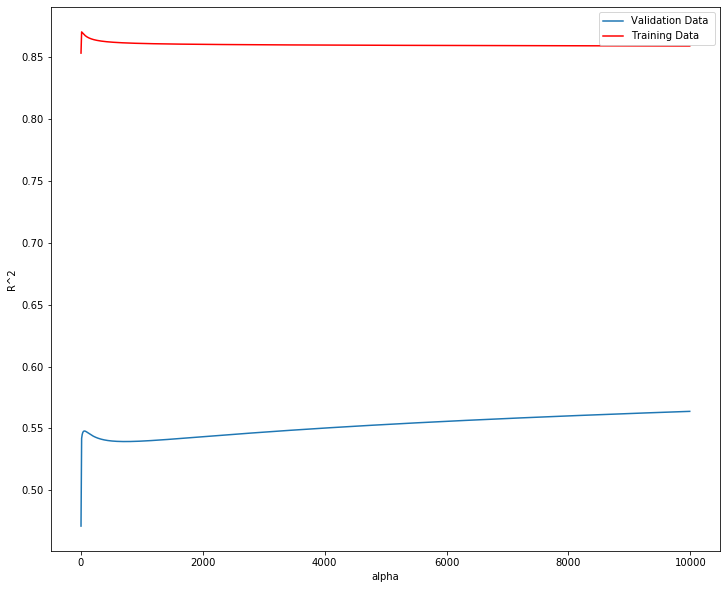

In [59]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA, Rsqu_test, label = 'Validation Data ')
plt.plot(ALFA, Rsqu_train, 'r', label = 'Training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [60]:
# Ridge Regression with alpha = 10

RidgeModel = Ridge(alpha = 10)

In [61]:
# Fit
RidgeModel.fit(x_train_pr, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [63]:
RidgeModel.score(x_test_pr, y_test)

0.5418576440206702

# Grid Search 

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
# Create a dictionary of parameter values

parameters1 = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}]

In [66]:
# Create a ridge regions object

RR = Ridge()
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [67]:
Grid1 = GridSearchCV(RR, parameters1, cv = 4)

In [68]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [69]:
BestRR = Grid1.best_estimator_
BestRR

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [70]:
# Test model on the test data

BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036152

In [71]:
parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)
Grid2.best_estimator_

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)